In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df_infrastructure = pd.read_csv(r'/content/infrastructure-damaged.csv')
df_killed = pd.read_csv(r'/content/killed-in-gaza.csv')
df_fatalities = pd.read_csv(r'/content/palestine_events_and_fatalities.csv')
df_press = pd.read_csv(r'/content/press_killed_in_gaza.csv')


<ipython-input-16-60d12a561082>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fatalities['Date'] = pd.to_datetime(df_fatalities['Month'] + ' ' + df_fatalities['Year'].astype(str))


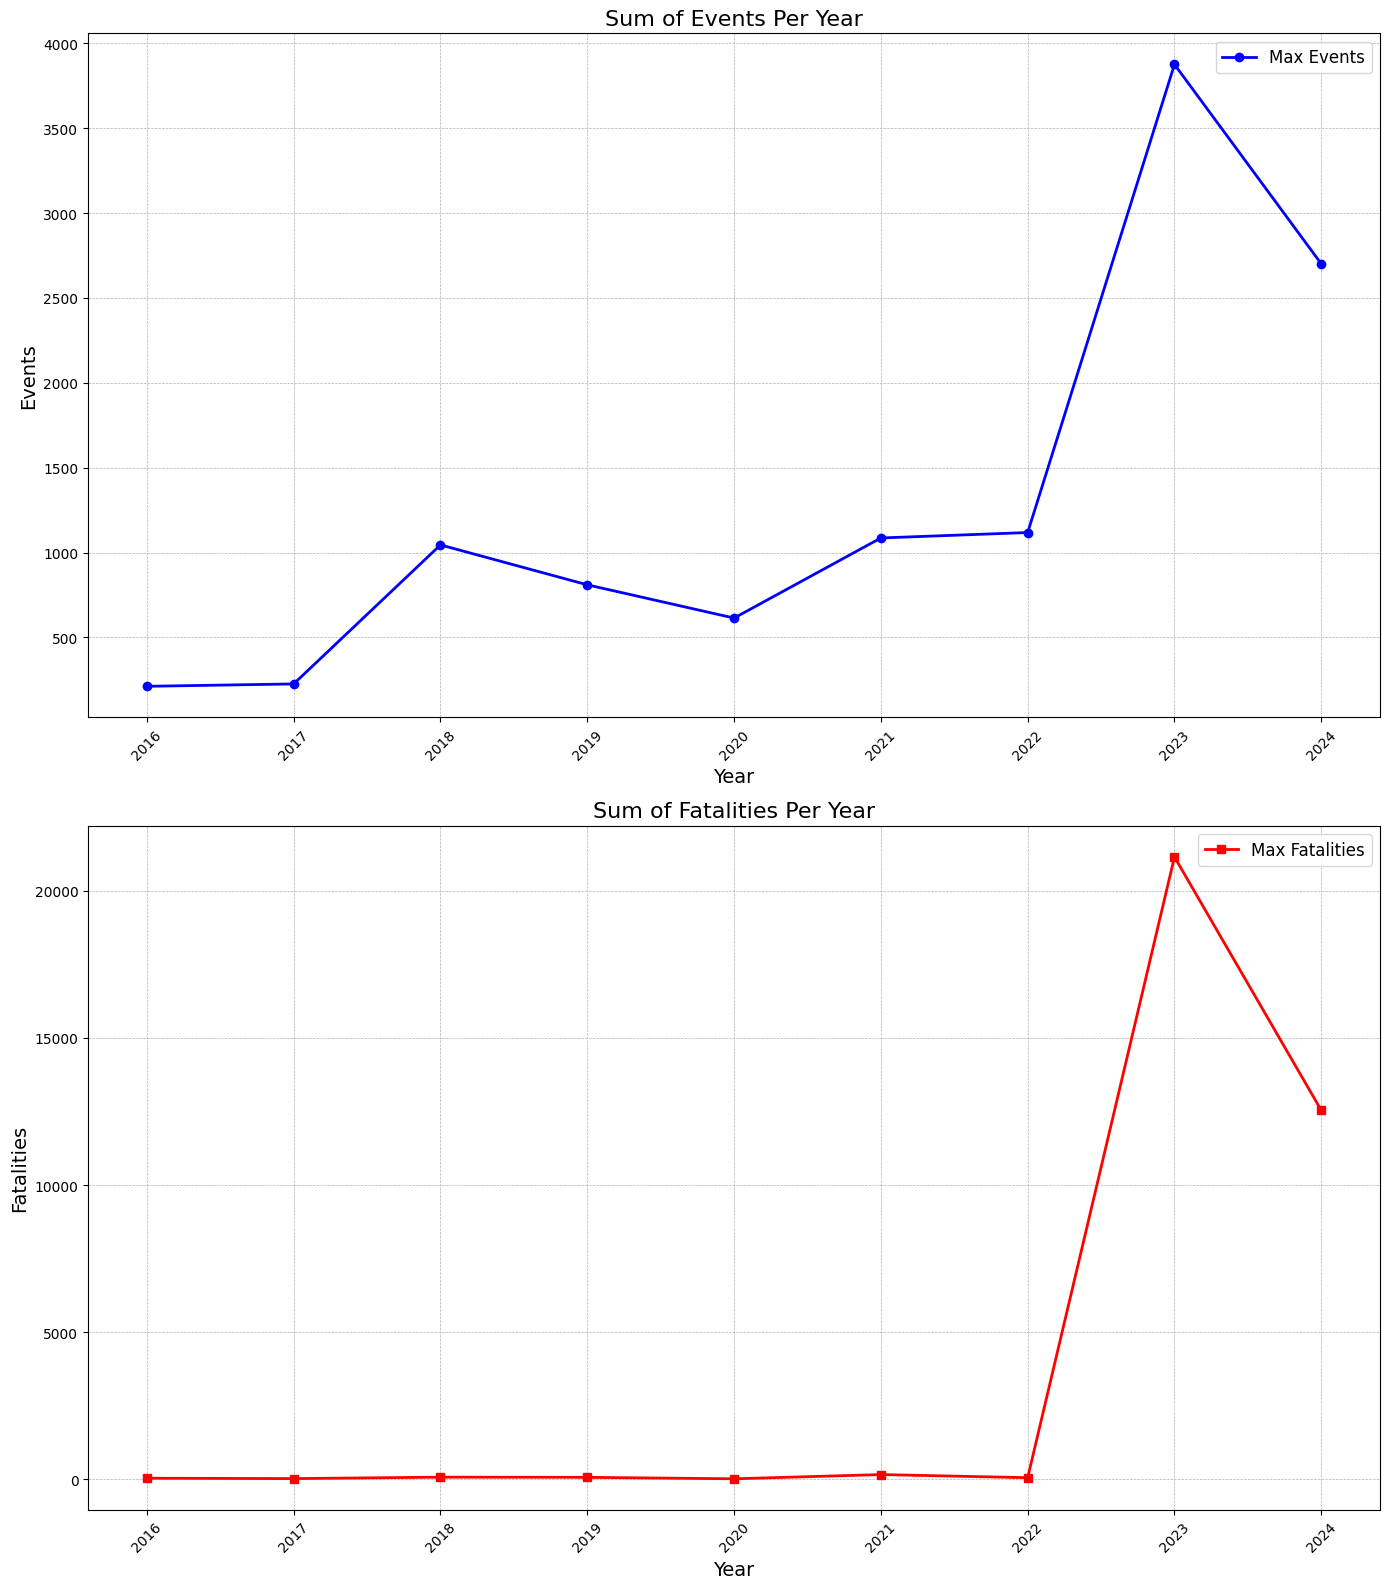

In [16]:


# Combine Month and Year into a single datetime column
df_fatalities['Date'] = pd.to_datetime(df_fatalities['Month'] + ' ' + df_fatalities['Year'].astype(str))

# Find the maximum values for each year
#max_values = df_fatalities.groupby('Year').max().reset_index()
# Find the sum of  values for each year
sum_values = df_fatalities.groupby('Year').sum(numeric_only=True).reset_index()

# Plot the maximum values
plt.figure(figsize=(14, 16))

# Plot max Events
plt.subplot(2, 1, 1)
plt.plot(sum_values['Year'], sum_values['Events'], marker='o', linestyle='-', color='blue', label='Max Events', linewidth=2)
plt.title('Sum of Events Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Plot max Fatalities
plt.subplot(2, 1, 2)
plt.plot(sum_values['Year'], sum_values['Fatalities'], marker='s', linestyle='-', color='red', label='Max Fatalities', linewidth=2)
plt.title('Sum of Fatalities Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Fatalities', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right')

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('Fatalities_and_Events.png')
plt.show()


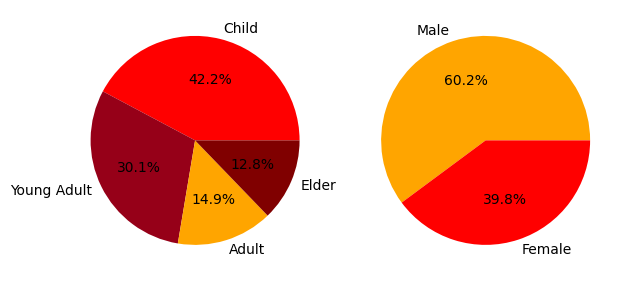

In [ ]:
age_classification_counts = df_killed['Age Classification'].value_counts()
sex= df_killed['Sex'].value_counts()
# Plot the age classifications
plt.subplot(1, 2, 1)
plt.pie(age_classification_counts, labels=age_classification_counts.index, autopct='%1.1f%%', colors=['red', '#960018', 'orange', '#800000'])


plt.subplot(1, 2, 2)
plt.pie(sex, labels=sex.index, autopct='%1.1f%%', colors=['orange','red'])
plt.tight_layout()
#plt.savefig('pie_chart.png')

plt.show()


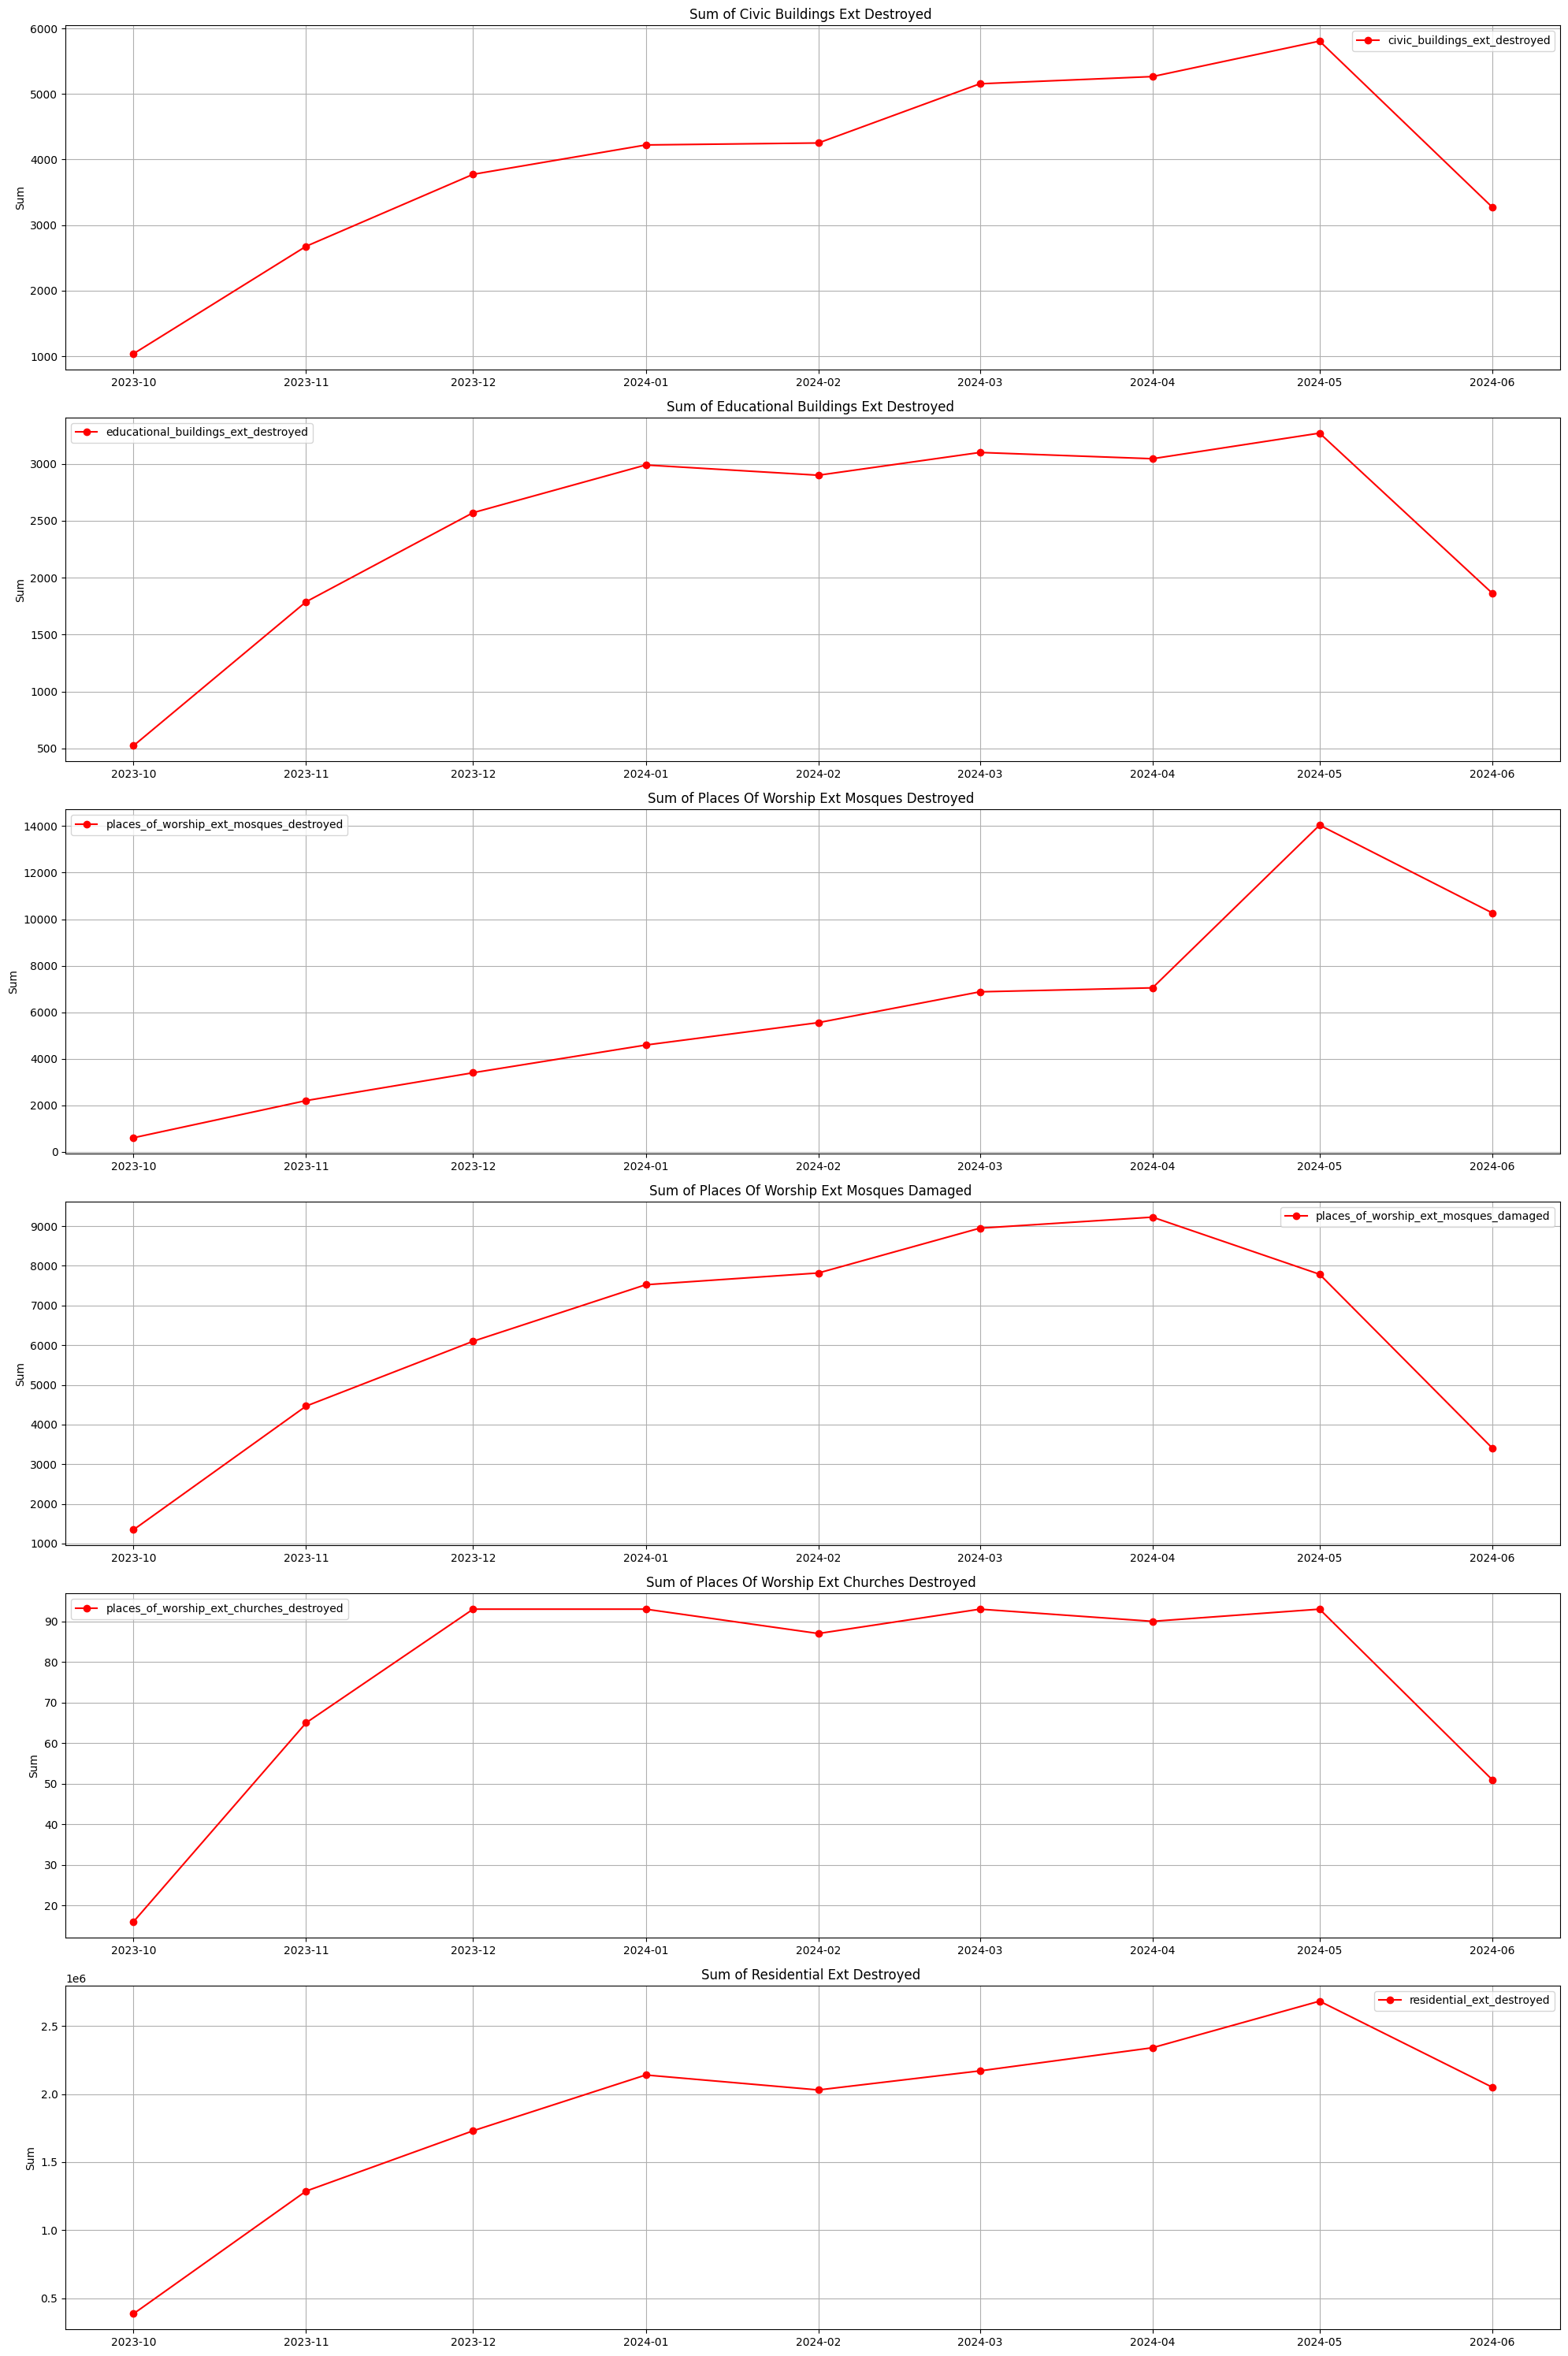

            civic_buildings_ext_destroyed  \
year_month                                  
2023-10-01                           1037   
2023-11-01                           2676   
2023-12-01                           3774   
2024-01-01                           4222   
2024-02-01                           4252   
2024-03-01                           5155   
2024-04-01                           5265   
2024-05-01                           5806   
2024-06-01                           3274   

            educational_buildings_ext_destroyed  \
year_month                                        
2023-10-01                                  523   
2023-11-01                                 1788   
2023-12-01                                 2571   
2024-01-01                                 2990   
2024-02-01                                 2900   
2024-03-01                                 3100   
2024-04-01                                 3045   
2024-05-01                                 32

In [ ]:

# Assuming df_infrastructure is your DataFrame
df_infrastructure['report_date'] = pd.to_datetime(df_infrastructure['report_date'])

# Extract month and year
df_infrastructure['year_month'] = df_infrastructure['report_date'].dt.to_period('M')

# Group by year_month and sum the specific columns
columns_to_plot = [
    'civic_buildings_ext_destroyed',
    'educational_buildings_ext_destroyed',

    'places_of_worship_ext_mosques_destroyed',
    'places_of_worship_ext_mosques_damaged',
    'places_of_worship_ext_churches_destroyed',
    'residential_ext_destroyed'
]


fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(20, 5 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    axes[i].plot(grouped_df.index, grouped_df[column],color ='red',marker='o', label=column)
    axes[i].set_title(f'Sum of {column.replace("_", " ").title()} ')

    axes[i].set_ylabel('Sum')
    axes[i].legend(loc=0)
    axes[i].grid(True)

plt.tight_layout()

plt.show()
print(grouped_df)